# **Project Title:** Car Price Prediction with Machine Learning

**Project Summary:**

In my project, "Predicting Car Prices," I embarked on a data-driven journey to develop a robust model for estimating car prices based on various vehicle attributes. My step-by-step exploration and analysis uncovered valuable insights and led to the creation of a predictive model that can significantly benefit the automotive industry.

**Key Steps and Findings:**

1. **Data Exploration and Preprocessing:**
   - I began by loading and exploring a comprehensive dataset containing information on car specifications and pricing.
   - Data preprocessing steps included handling missing values, encoding categorical variables, and deriving the Fuel Economy metric.

2. **Feature Selection:**
   - I identified a set of important predictor variables that play a significant role in determining car prices. These features included car length, car width, curb weight, engine size, horsepower, and more.

3. **Regression Models:**
   - I built and evaluated a variety of regression models to predict car prices. These models included:
     - Linear Regression
     - Ridge, Lasso, and ElasticNet Regression
     - Decision Tree Regression
     - Random Forest Regression
     - Support Vector Regression (SVR)
     - K-Nearest Neighbors (KNN) Regression
     - Gradient Boosting Regression
     - Neural Network Regression

4. **Model Evaluation:**
   - To assess the performance of each model, I used metrics such as Mean Squared Error (MSE) and R-squared (R^2).
   - Based on these metrics, I identified the top-performing models for predicting car prices.

**Key Findings:**

- **Random Forest Regression** emerged as the top-performing model, with the lowest MSE and high R-squared.
- **Linear Regression** variants (Ridge, Lasso, ElasticNet) provided a good balance between simplicity and performance.
- **Gradient Boosting Regression** also demonstrated strong predictive capabilities.

**Project Impact:**

My project equips car manufacturers, dealerships, and consumers with a powerful tool for estimating car prices accurately. These insights enhance decision-making, pricing strategies, and competitiveness in the ever-evolving automotive industry landscape. By leveraging machine learning techniques and comprehensive data analysis, my project contributes to better-informed choices in the car market.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supress the warnings
import warnings
warnings.filterwarnings('ignore')

### Data Exploring

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

1. `car_ID`: An identifier for each car in the dataset. It's a unique numerical value assigned to each car for tracking purposes.

2. `symboling`: This is an integer value representing the insurance risk rating of the car. It's often used by insurance companies to assess the risk associated with insuring a particular car. Positive values indicate a higher risk, while negative values indicate a lower risk.

3. `CarName`: The name or model of the car, which is represented as a string (object) data type. It typically includes the brand and model of the car.

4. `fueltype`: This column represents the type of fuel the car uses, which can be either "gas" or "diesel."

5. `aspiration`: Indicates whether the car has a turbocharger or not. It can be "std" (standard) or "turbo."

6. `doornumber`: Specifies the number of doors on the car, typically "two" or "four."

7. `carbody`: Describes the body style of the car, such as "sedan," "hatchback," "wagon," etc.

8. `drivewheel`: Indicates the type of drivetrain the car has, such as "fwd" (front-wheel drive), "rwd" (rear-wheel drive), or "4wd" (four-wheel drive).

9. `enginelocation`: Specifies where the car's engine is located, which can be "front" or "rear."

10. `wheelbase`: The distance between the centers of the front and rear wheels of the car. It's a numerical value measured in inches or millimeters.

11. `carlength`, `carwidth`, `carheight`: These columns represent the dimensions of the car, including length, width, and height. They are numerical values measured in inches or millimeters.

12. `curbweight`: The weight of the car without any passengers or cargo. It's a numerical value typically measured in pounds or kilograms.

13. `enginetype`: Describes the type of engine the car has, such as "ohc" (overhead camshaft), "ohcv" (overhead valve camshaft), etc.

14. `cylindernumber`: Specifies the number of cylinders in the car's engine, which can be "four," "six," "eight," etc.

15. `enginesize`: The size of the car's engine in cubic centimeters (cc) or cubic inches (ci). It's a numerical value.

16. `fuelsystem`: The type of fuel injection or delivery system used in the car, such as "mpfi" (multi-point fuel injection), "2bbl" (two-barrel carburetor), etc.

17. `boreratio`: The ratio of the cylinder bore's diameter to its stroke. It's a numerical value.

18. `stroke`: The length of the piston's stroke in the engine. It's a numerical value.

19. `compressionratio`: The compression ratio of the engine, which is a measure of how much the air-fuel mixture is compressed before ignition. It's a numerical value.

20. `horsepower`: The horsepower rating of the car's engine. It's a numerical value indicating the engine's power output.

21. `peakrpm`: The engine's peak revolutions per minute (RPM) at which it produces maximum power. It's a numerical value.

22. `citympg` and `highwaympg`: These columns represent the car's fuel efficiency in miles per gallon (MPG) for city and highway driving, respectively. They are numerical values.

In [4]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [7]:
# Handling the delimiters
df[['Maker','car_model']] = df["CarName"].str.split(" ", n=1, expand=True)

# Removing the CarName ,'and car_model colum  
df = df.drop(['CarName','car_model'],axis =1)
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Maker
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [8]:
df.Maker.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)



In the column make,We can observe following discrepancies:

    mazda car has been misspelled as maxda at many places
    porsche has been misspelled as porcshce
    toyota car has been mentioned as toyouta
    Nissan has been referred as nissan in some cases
    Volkswagen car has been misspelled as vokswagen and vw



In [9]:
df['Maker'] = df['Maker'].replace({"maxda": "mazda","porcshce": "porsche","toyouta": "toyota",
                                   "nissan": "Nissan","vokswagen": "volkswagen","vw": "volkswagen"})
df.head() 

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Maker
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


### Data Visualisation

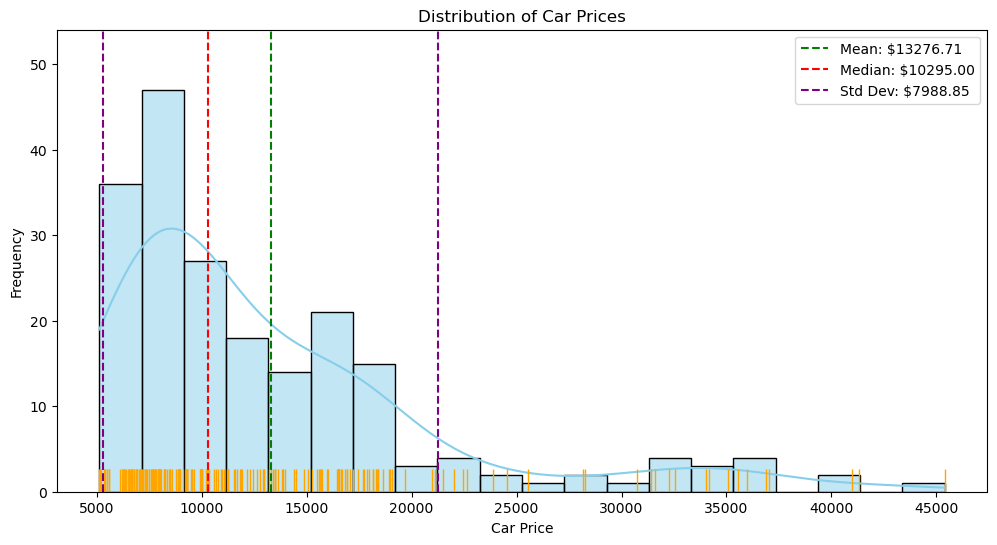

In [10]:
plt.figure(figsize=(12, 6))

# Plot the distribution of car prices
sns.histplot(df['price'], bins=20, kde=True, color='skyblue')

# Add labels and title
plt.xlabel('Car Price')
plt.ylabel('Frequency')
plt.title('Distribution of Car Prices')

# Add a rug plot to show individual data points
sns.rugplot(df['price'], color='orange', height=0.05)

# Add summary statistics (mean, median, and standard deviation)
mean_price = df['price'].mean()
median_price = df['price'].median()
std_price = df['price'].std()
plt.axvline(mean_price, color='green', linestyle='--', label=f'Mean: ${mean_price:.2f}')
plt.axvline(median_price, color='red', linestyle='--', label=f'Median: ${median_price:.2f}')
plt.axvline(mean_price + std_price, color='purple', linestyle='--', label=f'Std Dev: ${std_price:.2f}')
plt.axvline(mean_price - std_price, color='purple', linestyle='--')

# Add a legend
plt.legend()

# Show the plot
plt.show()

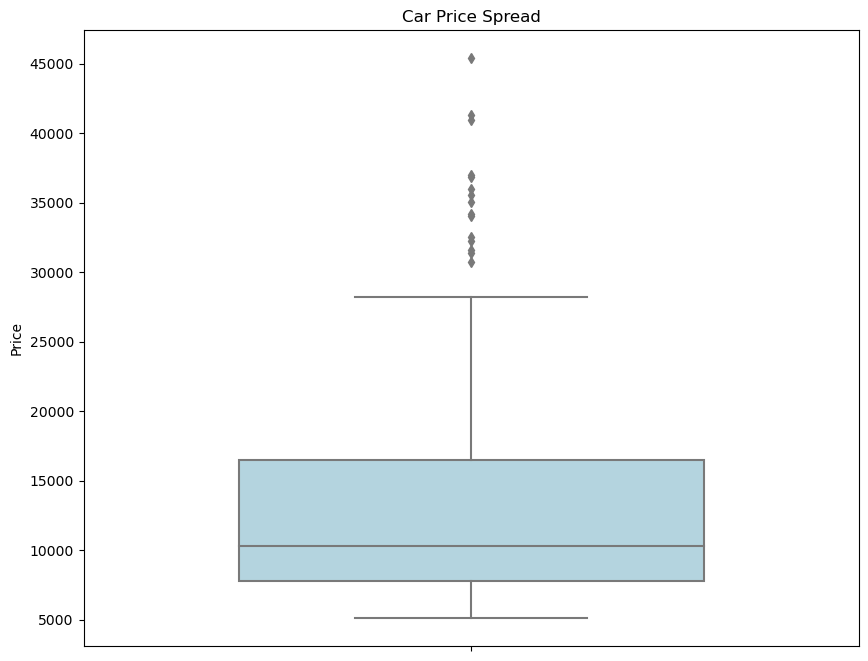

In [11]:
plt.figure(figsize=(10, 8))
plt.title('Car Price Spread')

# Create a boxplot for car prices
sns.boxplot(y=df['price'], color='lightblue', width=0.6, orient='v')

# Add labels
plt.ylabel('Price')
plt.xlabel('')

# Show the plot
plt.show()


1. **Right-Skewed Density Curve:**
   - The density curve of car prices is right-skewed, meaning that the majority of car prices in the dataset are concentrated towards the lower end. This indicates that most cars in the dataset have lower prices, while fewer cars have significantly higher prices. In other words, the dataset is dominated by relatively affordable cars, with a long tail of more expensive outliers.

2. **Significant Mean-Median Difference:**
   - The boxplot shows a noticeable difference between the mean and median of the price distribution. Specifically, the mean price is typically higher than the median price. This suggests that the distribution is positively skewed, with a few high-priced outliers pulling the mean upwards. The median, which is less sensitive to extreme values, provides a better measure of the central tendency for this distribution.

3. **Presence of Outliers:**
   - The boxplot reveals the presence of outliers in the price distribution. Outliers are data points that significantly deviate from the central bulk of the data. These outliers are represented as individual data points lying beyond the "whiskers" of the boxplot. While the dataset is relatively small, these extreme values may have a substantial impact on statistical analysis or modeling. However, it's noted that you have chosen not to handle these outliers in your analysis.

4. **Large Interquartile Range (IQR):**
   - The boxplot also shows a significant difference between the 75th percentile (upper quartile) and the maximum price value. This suggests that there is a wide range of prices within the upper end of the distribution. The large IQR indicates the spread of prices within the bulk of the data. While outliers exist, they do not substantially affect the overall spread within the IQR.

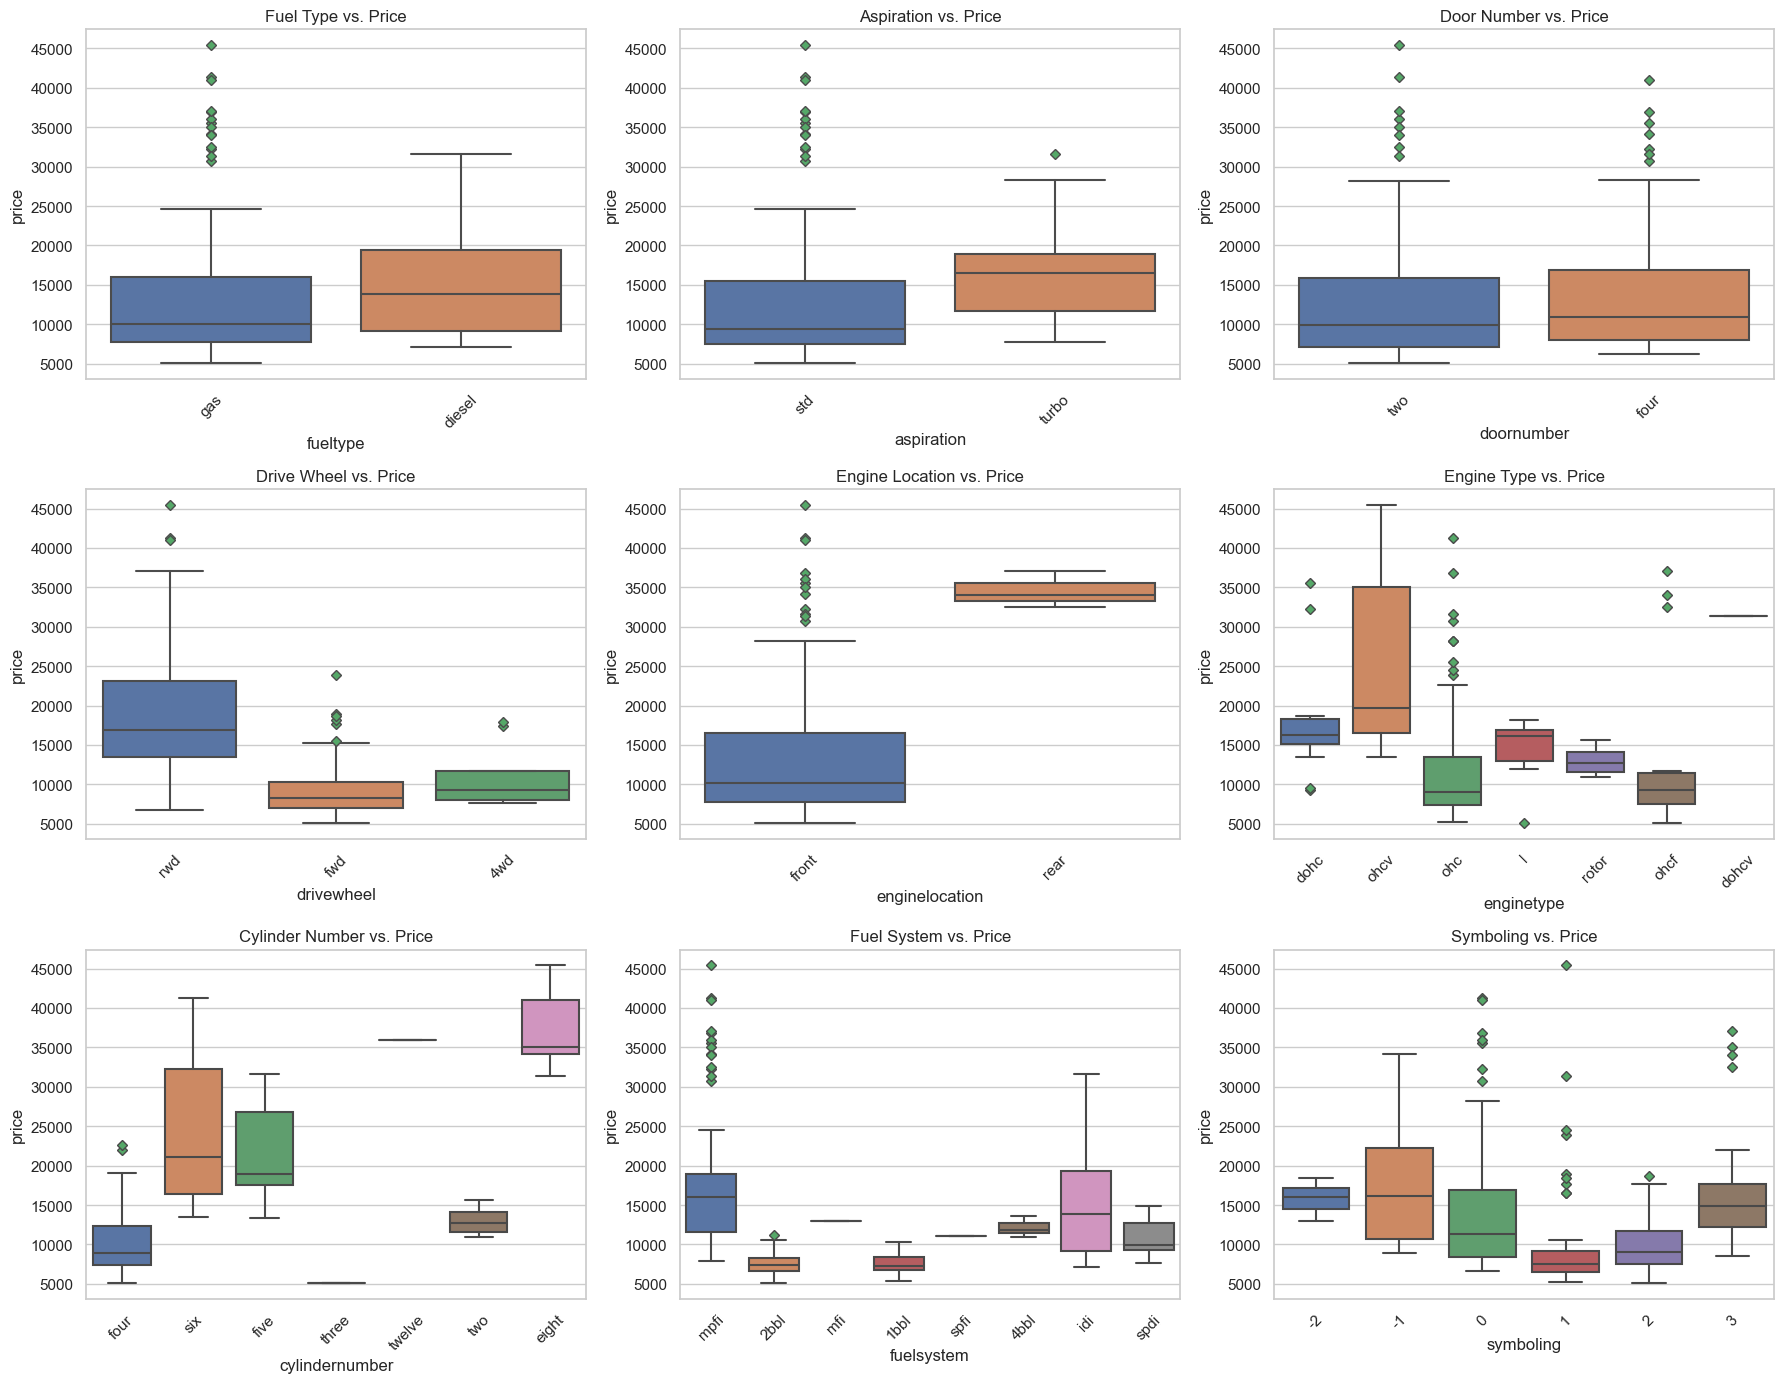

In [12]:
green_diamond = dict(markerfacecolor='g', marker='D')


# Set the style for the plots
sns.set(style="whitegrid")

# Create a catplot with subplots for each categorical variable
plt.figure(figsize=(18, 14))

order = None

# Create subplots for each categorical variable
plt.subplot(3, 3, 1)
sns.boxplot(y='price', x='fueltype', data=df, flierprops=green_diamond, order=order)
plt.xticks(rotation=45)
plt.title('Fuel Type vs. Price')

plt.subplot(3, 3, 2)
sns.boxplot(y='price', x='aspiration', data=df, flierprops=green_diamond, order=order)
plt.xticks(rotation=45)
plt.title('Aspiration vs. Price')

plt.subplot(3, 3, 3)
sns.boxplot(y='price', x='doornumber', data=df, flierprops=green_diamond, order=order)
plt.xticks(rotation=45)
plt.title('Door Number vs. Price')

plt.subplot(3, 3, 4)
sns.boxplot(y='price', x='drivewheel', data=df, flierprops=green_diamond, order=order)
plt.xticks(rotation=45)
plt.title('Drive Wheel vs. Price')

plt.subplot(3, 3, 5)
sns.boxplot(y='price', x='enginelocation', data=df, flierprops=green_diamond, order=order)
plt.xticks(rotation=45)
plt.title('Engine Location vs. Price')

plt.subplot(3, 3, 6)
sns.boxplot(y='price', x='enginetype', data=df, flierprops=green_diamond, order=order)
plt.xticks(rotation=45)
plt.title('Engine Type vs. Price')

plt.subplot(3, 3, 7)
sns.boxplot(y='price', x='cylindernumber', data=df, flierprops=green_diamond, order=order)
plt.xticks(rotation=45)
plt.title('Cylinder Number vs. Price')

plt.subplot(3, 3, 8)
sns.boxplot(y='price', x='fuelsystem', data=df, flierprops=green_diamond, order=order)
plt.xticks(rotation=45)
plt.title('Fuel System vs. Price')

plt.subplot(3, 3, 9)
sns.boxplot(y='price', x='symboling', data=df, flierprops=green_diamond, order=order)
plt.xticks(rotation=45)
plt.title('Symboling vs. Price')

# Adjust subplot spacing
plt.tight_layout()

# Show the plot
plt.show()

a.) **Symboling**
   - The `symboling` column represents an insurance risk rating for each car. It ranges from -2 (indicating lower risk) to 3 (indicating higher risk).
   - Cars with lower insurance risk ratings (e.g., -2, -1) tend to be associated with higher prices. In other words, safer cars are often more expensive.

b.) **Fueltype**
   - Cars with the "DIESEL" fuel type are generally less expensive compared to those with the "GAS" fuel type. Diesel cars tend to be more fuel-efficient but may have lower purchase prices.

c.) **Aspiration**
   - Cars with "Turbo" aspiration are typically more expensive than those without turbochargers. Turbocharged engines often provide higher performance, which can increase the cost of the car.

d.) **Doornumber**
   - While cars with four doors are generally more expensive than two-door cars, the difference in price between the two categories may not be significant. Therefore, the number of doors may have a limited impact on car prices.

e.) **Drivewheel**
   - Cars with "rwd" (rear-wheel drive) are generally more expensive than "fwd" (front-wheel drive) cars. Rear-wheel drive configurations are often associated with higher-performance vehicles, which can influence pricing.

f.) **Enginelocation**
   - There is a significant difference in pricing based on the engine location.
   - Cars with the engine located in the rear are significantly more expensive than cars with a front engine location. Rear-engine configurations are relatively rare and are typically found in high-performance or luxury vehicles.

g.) **Engine Type**
   - Cars with "ohcv" engine type tend to be more expensive than cars with other engine types. "ohcv" engines often offer better performance and features, which can contribute to higher prices.

h.) **Cylinder Number**
   - Cars with eight cylinders are among the most expensive cars compared to cars with fewer cylinders. However, pricing can vary based on other factors as well.

i.) **Fuelsystem**
   - Cars with the "mpfi" fuelsystem are generally more expensive than those with other fuelsystems. "mpfi" systems often provide better fuel efficiency and performance, contributing to higher prices.

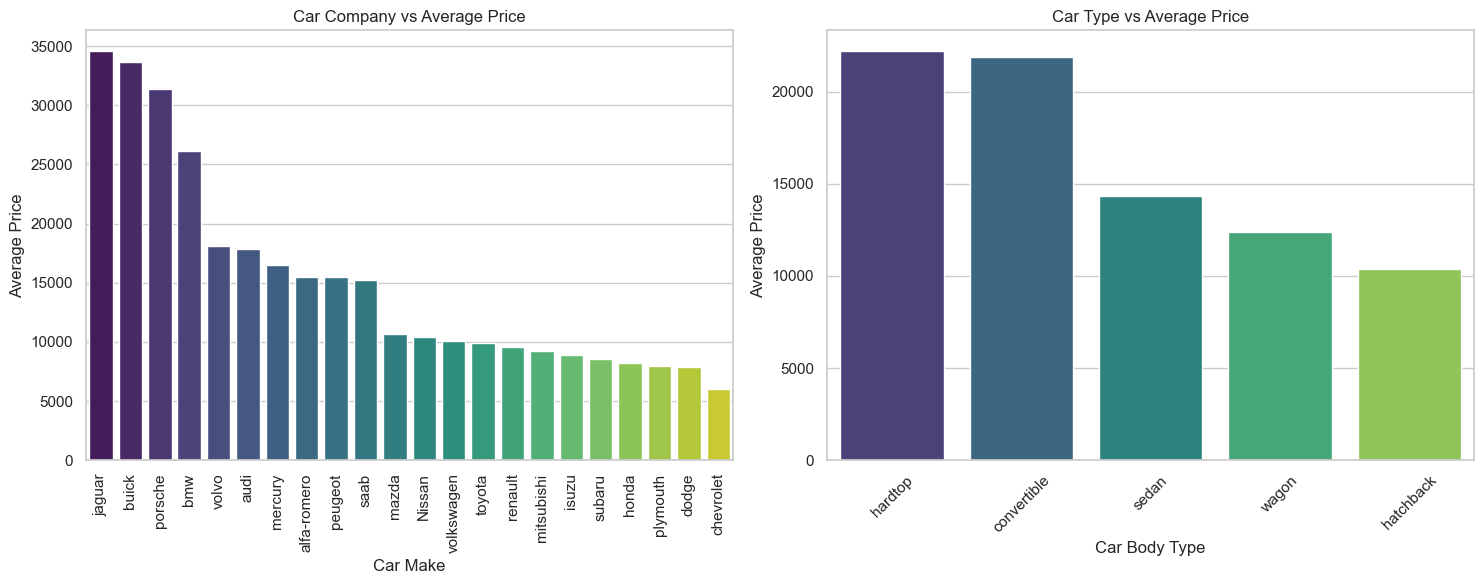

In [13]:
# Calculate average price by car make and car body type
make_gp = df.groupby('Maker')['price'].mean().sort_values(ascending=False)
body_gp = df.groupby('carbody')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(15, 6))

# Create the first subplot for car make vs. average price
plt.subplot(1, 2, 1)
sns.barplot(x=make_gp.index, y=make_gp.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Car Make')
plt.ylabel('Average Price')
plt.title('Car Company vs Average Price')

# Create the second subplot for car body type vs. average price
plt.subplot(1, 2, 2)
sns.barplot(x=body_gp.index, y=body_gp.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Car Body Type')
plt.ylabel('Average Price')
plt.title('Car Type vs Average Price')
plt.tight_layout()
plt.show()

1. **Car Brands (Maker)**:
   - Cars manufactured by the company "Jaguar" are consistently among the most expensive in the dataset. They tend to have higher average prices compared to cars from other companies.
   - Similarly, cars from the brand "Buick" are also significantly more expensive on average compared to cars from other manufacturers. Buick cars are among the pricier options in the dataset.

2. **Car Body Types**:
   - Cars with body types "Hardtop" and "Convertible" are generally more expensive than other types of cars in the dataset. These body styles command higher average prices.
   - In contrast, other body types such as "Sedan," "Hatchback," and "Wagon" tend to have lower average prices compared to hardtop and convertible cars.

In [14]:
df = df.drop('car_ID', axis=1)

correlation_matrix = df.select_dtypes(exclude='object').corr()
correlation_matrix


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


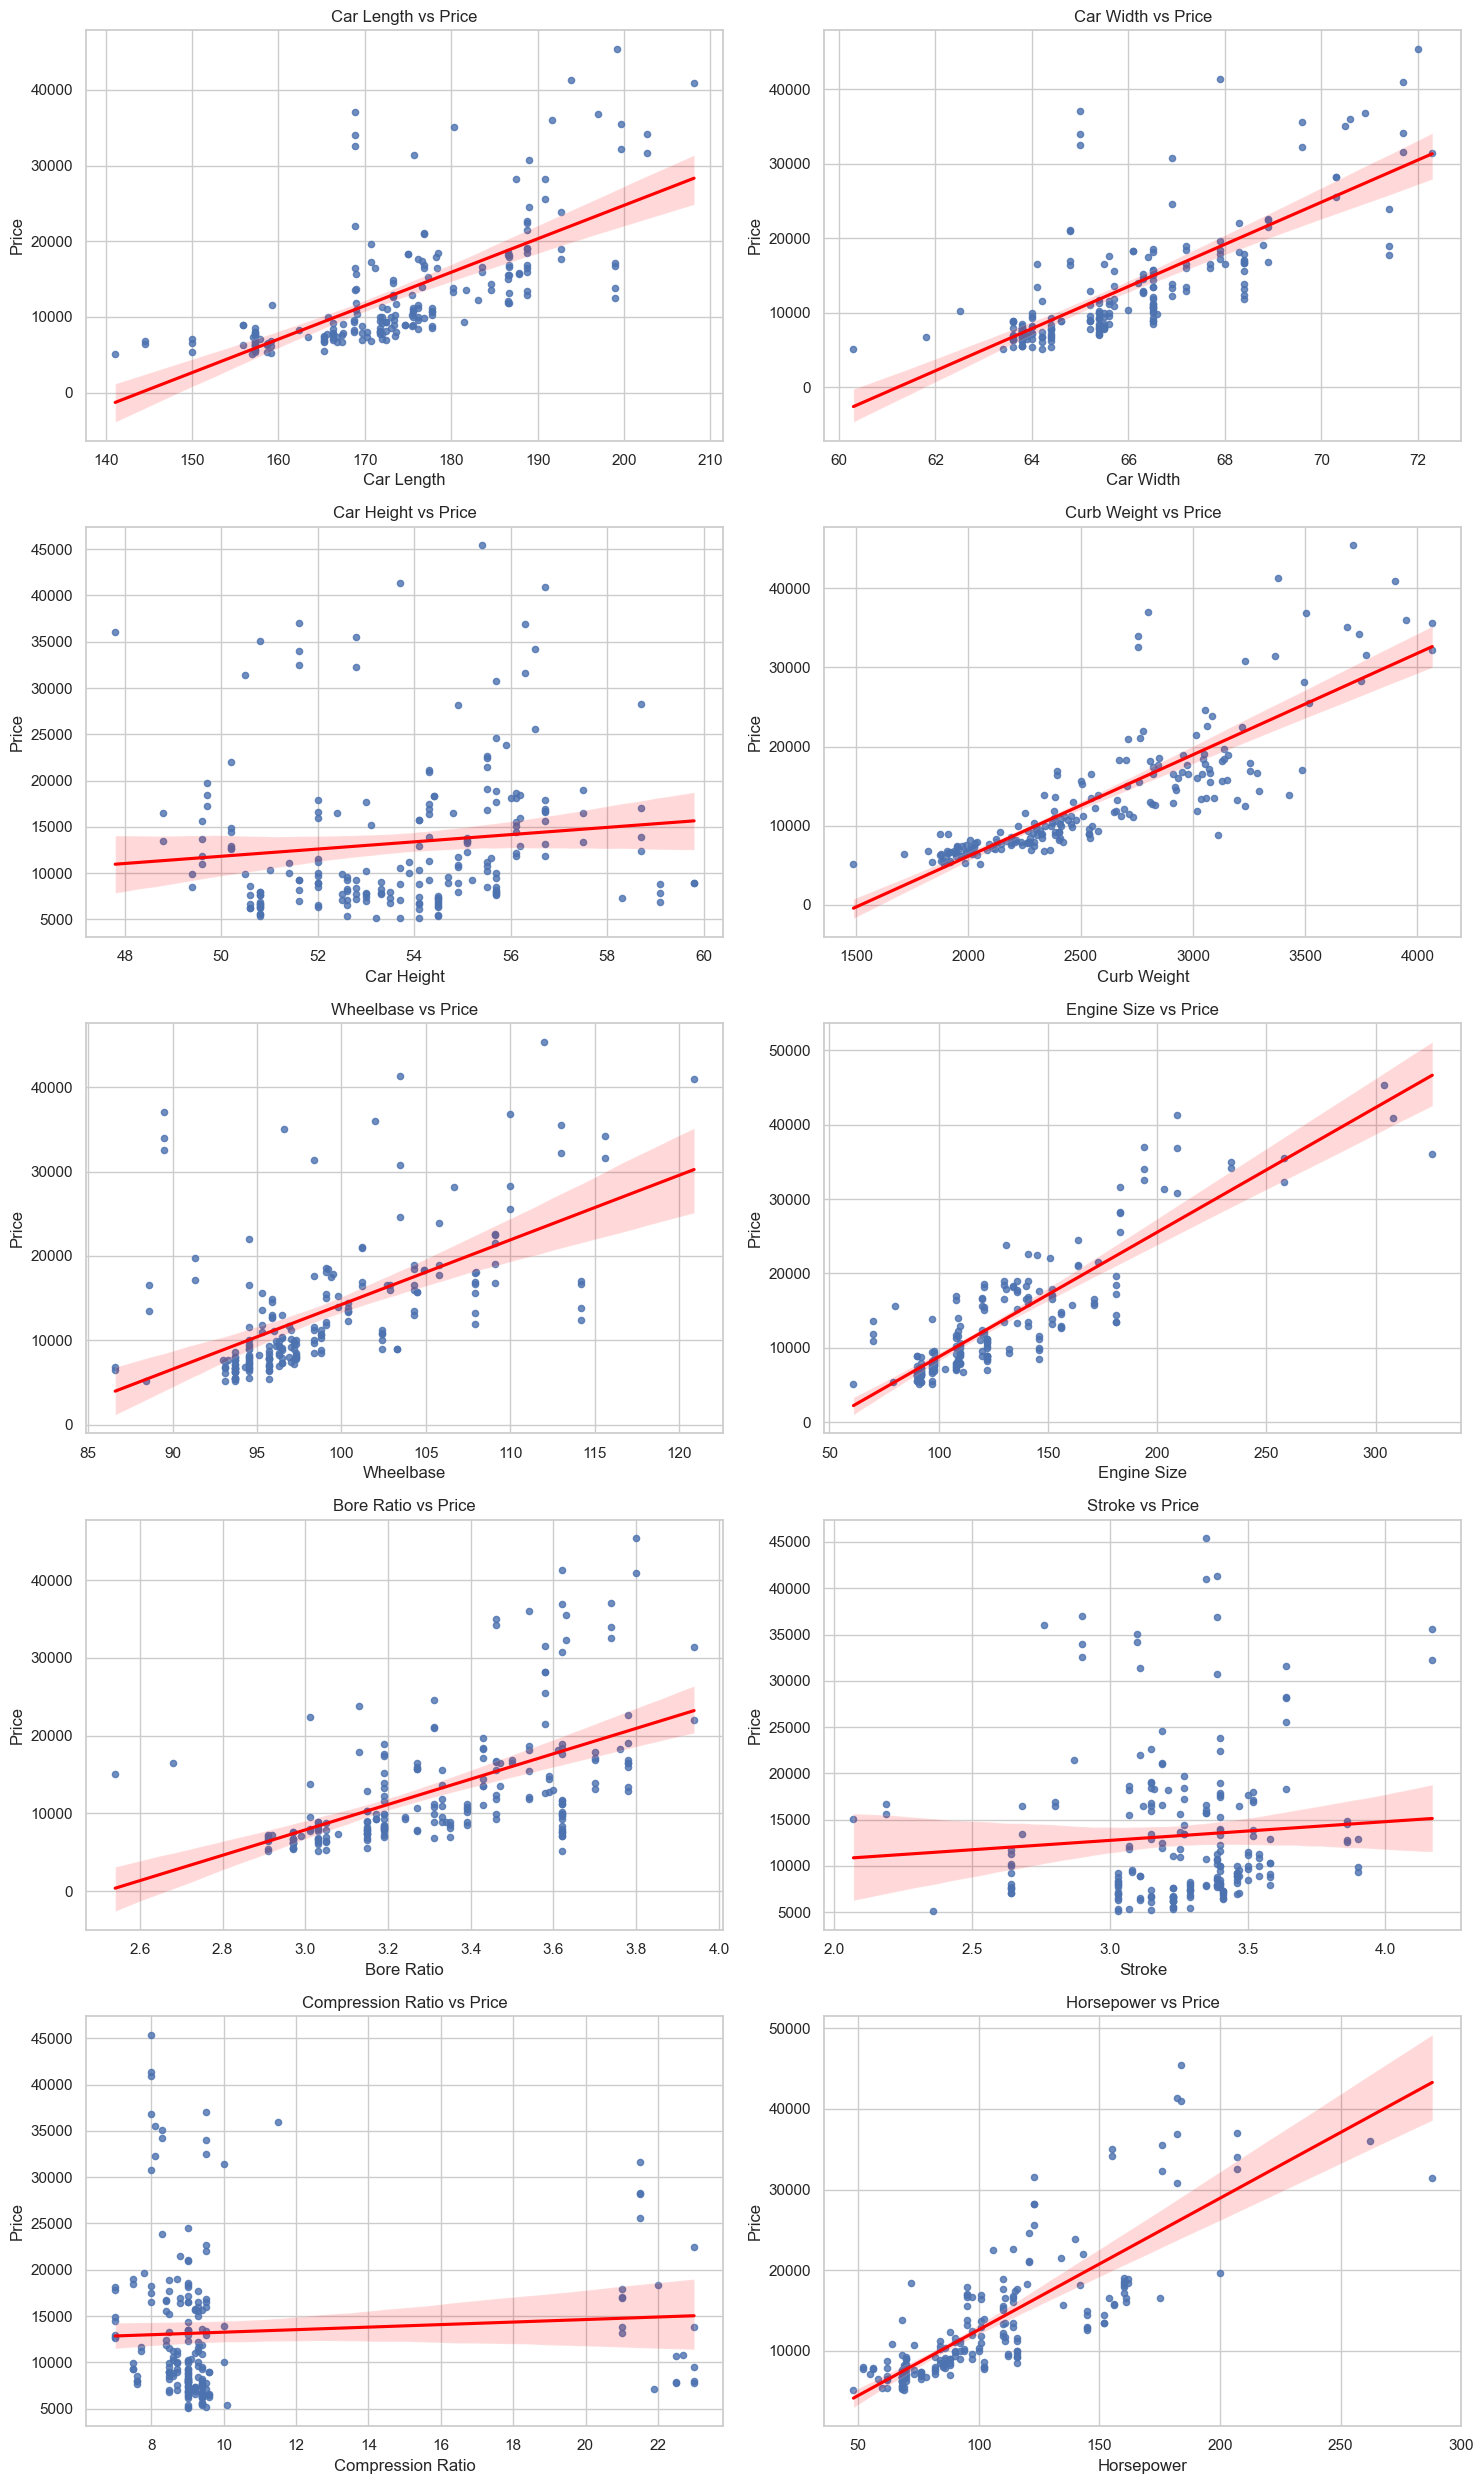

In [15]:
# Define a function to create regression plots
def regplot(x, y, fig, xlabel, ylabel):
    plt.subplot(5, 2, fig)
    sns.regplot(x=x, y=y, data=df, scatter_kws={"s": 20}, line_kws={"color": "red"})
    plt.title(f'{xlabel} vs Price')
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

# Create a figure with subplots
plt.figure(figsize=(15, 25))

# Plot regression plots for selected features
regplot('carlength', 'price', 1, 'Car Length', 'Price')
regplot('carwidth', 'price', 2, 'Car Width', 'Price')
regplot('carheight', 'price', 3, 'Car Height', 'Price')
regplot('curbweight', 'price', 4, 'Curb Weight', 'Price')
regplot('wheelbase', 'price', 5, 'Wheelbase', 'Price')
regplot('enginesize', 'price', 6, 'Engine Size', 'Price')
regplot('boreratio', 'price', 7, 'Bore Ratio', 'Price')
regplot('stroke', 'price', 8, 'Stroke', 'Price')
regplot('compressionratio', 'price', 9, 'Compression Ratio', 'Price')
regplot('horsepower', 'price', 10, 'Horsepower', 'Price')

# Adjust subplot spacing
plt.tight_layout()

# Show the plot
plt.show()

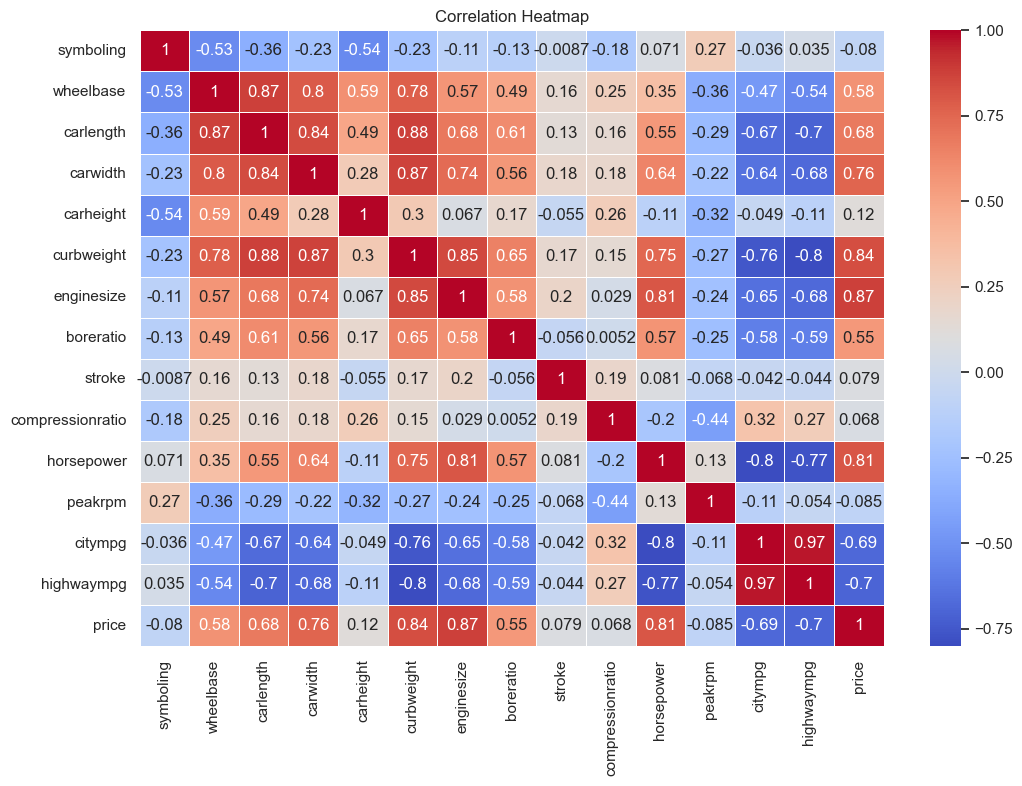

In [16]:
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

1. **High Positive Correlation with Price**:
   - Car Width (carwidth), Curb Weight (curbweight), and Wheelbase (wheelbase) show a strong positive correlation with the target variable (price). As these variables increase, the car price tends to increase as well. This suggests that these attributes significantly influence the pricing of cars in the dataset.

1. **High Positive Correlation with Price**:
   - The features "enginesize" and "horsepower" exhibit a strong positive correlation with the target variable (price). As these features increase, the car price tends to increase as well. This indicates that larger engines and higher horsepower contribute to higher car prices.

2. **High Negative Correlation with Price**:
   - Conversely, the features "citympg" and "highwaympg" display a strong negative correlation with the target variable (price). As these features increase (indicating better fuel efficiency), car prices tend to decrease. Cars with better fuel efficiency are typically priced lower.

3. **Presence of Outliers**:
   - It's important to note that there are many outliers in the dataset, as observed in the scatter plots. Outliers are data points that significantly deviate from the general trend in the scatter plot.
   - Despite the presence of outliers, it has been decided not to address them in this analysis due to the small size of the dataset.

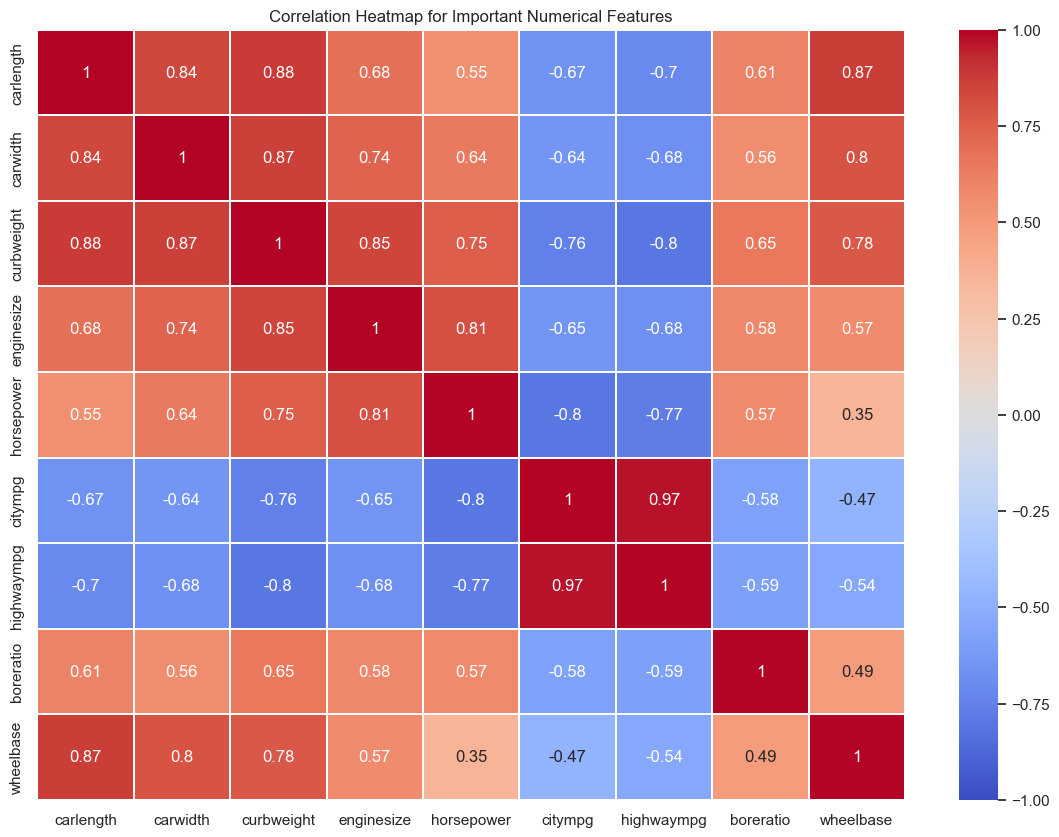

In [17]:
# Define the important numerical features
num_features = ['carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower', 'citympg', 'highwaympg', 'boreratio', 'wheelbase']

# Calculate the correlation matrix for these features
correlation_matrix = df[num_features].corr()

# Create the heatmap with a different colormap (coolwarm)
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", robust=True, linewidths=0.1, vmin=-1)
plt.title('Correlation Heatmap for Important Numerical Features')
plt.show()

1. **Symboling (with -1 rating)**: Cars with a symboling rating of -1 tend to have an impact on pricing, indicating lower insurance risk.

2. **Fuel Type (Diesel)**: Cars with a diesel fuel type may have different pricing compared to other fuel types.

3. **Aspiration (Turbo)**: Cars with a turbo aspiration system may be priced differently due to their performance characteristics.

4. **Drive Wheel (RWD)**: Rear-wheel-drive (RWD) cars can impact pricing compared to front-wheel-drive (FWD) cars.

5. **Car Body (Convertible, Hardtop)**: Cars with body types like convertible and hardtop can affect pricing due to their design and style.

6. **Fuel System (MPFI, IDI)**: Cars with specific fuel systems such as Multi-Point Fuel Injection (MPFI) and Indirect Diesel Injection (IDI) may have pricing differences.

7. **Cylinder Number (Eight)**: Cars with eight cylinders can significantly impact pricing compared to other cylinder configurations.

8. **Engine Type (OHCV)**: Cars with an Overhead Camshaft (OHC) with a V-shaped configuration (OHCV) may affect pricing.

9. **Engine Location (Rear)**: Cars with rear-engine placement can have a significant impact on pricing due to their unique design.

10. **Car Length**: The length of the car can impact pricing, with longer cars potentially being priced differently.

11. **Car Width**: The width of the car can influence pricing, with wider cars potentially having different price ranges.

12. **Curb Weight**: The curb weight of a car can impact pricing, with heavier cars potentially being priced differently.

13. **Engine Size**: The size of the engine, typically measured in cubic centimeters (cc) or liters (L), can have a significant impact on pricing.

14. **Horsepower**: The horsepower rating of a car's engine can influence pricing, with more powerful engines potentially commanding higher prices.

15. **City MPG**: The city fuel efficiency (miles per gallon) of a car can impact pricing, with more fuel-efficient cars potentially having different prices.

16. **Highway MPG**: The highway fuel efficiency (miles per gallon) of a car can also influence pricing.

17. **Bore Ratio**: The bore ratio, which relates to the diameter of the engine cylinders, can impact pricing.

18. **Wheelbase**: The wheelbase, or the distance between the front and rear axles, can have an effect on pricing due to its impact on vehicle size and handling.

In [18]:
# Select the important features
selected_features = ['symboling', 'fueltype', 'aspiration', 'drivewheel', 'carbody', 'cylindernumber',
                     'enginetype', 'enginelocation', 'carlength', 'carwidth', 'curbweight', 'enginesize',
                     'horsepower', 'citympg', 'highwaympg', 'boreratio', 'wheelbase', 'Maker', 'price']

# Create the car_lm DataFrame with the selected features
df1 = df[selected_features]

# Display the first few rows of the car_lm DataFrame
df1.head()

,symboling,fueltype,aspiration,drivewheel,carbody,cylindernumber,enginetype,enginelocation,carlength,carwidth,curbweight,enginesize,horsepower,citympg,highwaympg,boreratio,wheelbase,Maker,price
0,3,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,21,27,3.47,88.6,alfa-romero,13495.0
1,3,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,21,27,3.47,88.6,alfa-romero,16500.0
2,1,gas,std,rwd,hatchback,six,ohcv,front,171.2,65.5,2823,152,154,19,26,2.68,94.5,alfa-romero,16500.0
3,2,gas,std,fwd,sedan,four,ohc,front,176.6,66.2,2337,109,102,24,30,3.19,99.8,audi,13950.0
4,2,gas,std,4wd,sedan,five,ohc,front,176.6,66.4,2824,136,115,18,22,3.19,99.4,audi,17450.0


In [19]:
df1.shape

(205, 19)

### Data Preparation

**Combined Fuel Economy**: Combined fuel economy is a metric that quantifies the average fuel efficiency of a vehicle by taking into account both city and highway mileage. It provides a more comprehensive understanding of a vehicle's fuel efficiency in real-world driving conditions.

The calculation of combined fuel economy involves two key factors:

1. **City Mileage**: This represents the number of miles a vehicle can travel on a gallon of fuel under typical urban driving conditions, which often involve frequent stops and starts.

2. **Highway Mileage**: This reflects the number of miles a vehicle can travel on a gallon of fuel under steady, highway driving conditions, where speeds are relatively consistent.

The EPA suggests a specific weighting for these two factors in the calculation of combined fuel economy:

- 55% weight on City Mileage
- 45% weight on Highway Mileage

The formula for calculating combined fuel economy is:

Fuel Economy = (0.45 x Highway Mileage) + (0.55 x City Mileage)

This combined metric is valuable for consumers and regulators because it provides a more balanced representation of a vehicle's fuel efficiency, considering both city and highway driving scenarios. Manufacturers often provide combined fuel economy ratings on vehicle labels and in marketing materials to help consumers make informed decisions about fuel-efficient vehicles.

(Reference - https://www.epa.gov/fueleconomy/text-version-gasoline-label)

In [20]:
# Calculate Fuel Economy using the specified weights
df1['fuel_economy'] = (0.45 * df1['highwaympg']) + (0.55 * df1['citympg'])
car_lm = df1.drop(['citympg', 'highwaympg'], axis=1)

df1.head()

,symboling,fueltype,aspiration,drivewheel,carbody,cylindernumber,enginetype,enginelocation,carlength,carwidth,curbweight,enginesize,horsepower,citympg,highwaympg,boreratio,wheelbase,Maker,price,fuel_economy
0,3,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,21,27,3.47,88.6,alfa-romero,13495.0,23.70
1,3,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,21,27,3.47,88.6,alfa-romero,16500.0,23.70
2,1,gas,std,rwd,hatchback,six,ohcv,front,171.2,65.5,2823,152,154,19,26,2.68,94.5,alfa-romero,16500.0,22.15
3,2,gas,std,fwd,sedan,four,ohc,front,176.6,66.2,2337,109,102,24,30,3.19,99.8,audi,13950.0,26.70
4,2,gas,std,4wd,sedan,five,ohc,front,176.6,66.4,2824,136,115,18,22,3.19,99.4,audi,17450.0,19.80


In [21]:
# Create a pivot table to calculate the average price by make
make_gp = df.groupby('Maker')['price'].mean().sort_values(ascending=False).reset_index()

# Rename the 'price' column to 'average_price'
make_gp.rename(columns={'price': 'average_price'}, inplace=True)
make_gp

,Maker,average_price
0,jaguar,34600.000000
1,buick,33647.000000
2,porsche,31400.500000
3,bmw,26118.750000
4,volvo,18063.181818
5,audi,17859.166714
6,mercury,16503.000000
7,alfa-romero,15498.333333
8,peugeot,15489.090909
9,saab,15223.333333


In [22]:
df1 = df1.merge(make_gp, how='left', on='Maker')

bins = [float('-inf'), np.percentile(df1['average_price'], 33), np.percentile(df1['average_price'], 67), float('inf')]
bin_labels = ['Economic', 'Medium', 'Luxury']

df1['class'] = pd.cut(df1['average_price'], bins, labels=bin_labels)

df1['class'] = df1['class'].astype(str)

df1 = df1.drop('Maker', axis=1)

df1 = df1.drop('average_price', axis=1)

df1.head()

,symboling,fueltype,aspiration,drivewheel,carbody,cylindernumber,enginetype,enginelocation,carlength,carwidth,curbweight,enginesize,horsepower,citympg,highwaympg,boreratio,wheelbase,price,fuel_economy,class
0,3,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,21,27,3.47,88.6,13495.0,23.70,Luxury
1,3,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,21,27,3.47,88.6,16500.0,23.70,Luxury
2,1,gas,std,rwd,hatchback,six,ohcv,front,171.2,65.5,2823,152,154,19,26,2.68,94.5,16500.0,22.15,Luxury
3,2,gas,std,fwd,sedan,four,ohc,front,176.6,66.2,2337,109,102,24,30,3.19,99.8,13950.0,26.70,Luxury
4,2,gas,std,4wd,sedan,five,ohc,front,176.6,66.4,2824,136,115,18,22,3.19,99.4,17450.0,19.80,Luxury


In [23]:
categorical_columns = ['symboling', 'fueltype', 'aspiration', 'drivewheel', 'carbody', 'cylindernumber',
                       'enginetype', 'enginelocation', 'class']

# Perform one-hot encoding for the categorical columns
df1_encoded = pd.get_dummies(df1, columns=categorical_columns, drop_first=True)

df1_encoded.head()

,carlength,carwidth,curbweight,enginesize,horsepower,citympg,highwaympg,boreratio,wheelbase,price,...,cylindernumber_two,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,enginelocation_rear,class_Luxury,class_Medium
0,168.8,64.1,2548,130,111,21,27,3.47,88.6,13495.0,...,False,False,False,False,False,False,False,False,True,False
1,168.8,64.1,2548,130,111,21,27,3.47,88.6,16500.0,...,False,False,False,False,False,False,False,False,True,False
2,171.2,65.5,2823,152,154,19,26,2.68,94.5,16500.0,...,False,False,False,False,False,True,False,False,True,False
3,176.6,66.2,2337,109,102,24,30,3.19,99.8,13950.0,...,False,False,False,True,False,False,False,False,True,False
4,176.6,66.4,2824,136,115,18,22,3.19,99.4,17450.0,...,False,False,False,True,False,False,False,False,True,False


In [24]:
df1_encoded.shape

(205, 39)

### Data Splitting  and feature scaling

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

target_variable = 'price'

X = df1_encoded.drop(target_variable, axis=1)
y = df1_encoded[target_variable]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (143, 38)
X_test shape: (62, 38)
y_train shape: (143,)
y_test shape: (62,)


### Trying different RegressioN Models

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import pandas as pd

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'ElasticNet Regression': ElasticNet(alpha=1.0, l1_ratio=0.5),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100),
    'SVR': SVR(kernel='linear'),
    'KNN Regression': KNeighborsRegressor(n_neighbors=5),
    'Gradient Boosting Regression': GradientBoostingRegressor(n_estimators=100),
    'Neural Network Regression': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000)
}

# Define evaluation metrics
metrics = {
    'MSE': make_scorer(mean_squared_error),
    'R-squared': make_scorer(r2_score),
}

# List to store individual DataFrames
dfs = []

# Iterate through the models and evaluate them
for model_name, model in models.items():
    mse_scores = cross_val_score(model, X_train, y_train, cv=5, scoring=metrics['MSE'])
    r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring=metrics['R-squared'])
    # Create a DataFrame for the current model evaluation
    model_df = pd.DataFrame({
        'Model': model_name,
        'MSE': mse_scores.mean(),
        'R-squared': r2_scores.mean()
    }, index=[0])  # Make sure to set index to [0] to ensure proper concatenation
    dfs.append(model_df)

# Concatenate all individual DataFrames into one
results_df = pd.concat(dfs, ignore_index=True)

# Display the results DataFrame
print(results_df)

 ### Improvements:

    Uses GridSearchCV for hyperparameter tuning with predefined hyperparameter grids for specific models.
    Avoids redundant model evaluation code and computes MSE and R-squared for each model.

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
import pandas as pd

# Create an empty list to store individual DataFrames
dfs = []

# Iterate through the models and perform hyperparameter tuning
for model_name, model in models.items():
    param_grid = {}  # Define hyperparameters to tune for each model
    if model_name == 'Ridge Regression':
        param_grid = {'alpha': [0.01, 0.1, 1, 10]}
    elif model_name == 'Lasso Regression':
        param_grid = {'alpha': [0.01, 0.1, 1, 10]}
    elif model_name == 'ElasticNet Regression':
        param_grid = {'alpha': [0.01, 0.1, 1, 10], 'l1_ratio': [0.1, 0.5, 0.9]}
    elif model_name == 'Random Forest Regression':
        param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
    elif model_name == 'SVR':
        param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    elif model_name == 'KNN Regression':
        param_grid = {'n_neighbors': [3, 5, 7]}
    elif model_name == 'Gradient Boosting Regression':
        param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
    elif model_name == 'Neural Network Regression':
        param_grid = {'hidden_layer_sizes': [(100,), (100, 50)], 'alpha': [0.0001, 0.001]}

    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)

    # Create a DataFrame for the current model results
    model_df = pd.DataFrame({'Model': model_name, 'MSE': mse, 'R-squared': r_squared}, index=[0])
    dfs.append(model_df)

# Concatenate all individual DataFrames into one
results_df = pd.concat(dfs, ignore_index=True)

results_df

1. **Lowest MSE (Mean Squared Error):**
   - Random Forest Regression: It has the lowest MSE, indicating better predictive performance.
   - Decision Tree Regression: Also has a relatively low MSE.

2. **Highest R-squared (R^2):**
   - Random Forest Regression: It has the highest R-squared, which means it explains the most variance in the target variable.
   - Decision Tree Regression: Also has a high R-squared.

3. **Consideration for Simplicity:**
   - Linear Regression, Ridge Regression, Lasso Regression, and ElasticNet Regression: These models provide a good balance between simplicity and performance. If interpretability is important, linear models are a good choice.

4. **Computational Efficiency:**
   - Linear models (Linear Regression, Ridge, Lasso, ElasticNet) and Decision Tree Regression tend to be computationally efficient compared to ensemble methods (Random Forest, Gradient Boosting) and complex models (Neural Network).

5. **Robustness to Overfitting:**
   - Random Forest Regression and Gradient Boosting Regression generally handle overfitting well due to ensemble averaging.

6. **Interpretability:**
   - Linear Regression, Ridge, Lasso, and ElasticNet provide interpretable coefficients.

Based on these considerations, I might consider the following models:

1. **Random Forest Regression:** It performed well in terms of both MSE and R-squared and is robust to overfitting. It's a strong choice for predictive modeling.

2. **Decision Tree Regression:** It also performed well and is a simpler model. It can be a good choice if interpretability and computational efficiency are important.

3. **Linear Regression, Ridge, Lasso, ElasticNet:** If I prefer interpretable models and don't mind slightly higher MSE, these linear models are suitable.

4. **Gradient Boosting Regression:** It performed well in terms of R-squared, but I might consider it if computational resources are not a limitation.